## 1. Importación de librerías y cargar datos del CSV

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
import glob
import random
import cv2
from Data_Paths import *

Ruta al csv

In [3]:
labeled_dataset_path = CSV_DATSET

Cargar los datos por categoría

In [4]:
# Diccionarios para contar la cantidad de datos por categoría y tipo
category_type_count = {'real': 0, 'fake': 0}
data_type_count = {'train': 0, 'test': 0, 'val': 0}

# Abrimos en modo lectura el CSV 
with open(labeled_dataset_path, 'r') as csvfile:
    csvreader = csv.DictReader(csvfile)
    for row in csvreader:
        # Incrementamos el contador según la categoría
        category_type_count[row['category_label']] += 1
        
        # Incrementamos el contador según el tipo
        data_type_count[row['data_label']] += 1

In [5]:
# Mostrar los resultados
print("Cantidad de datos por categoría:")
for category_type, category_count in category_type_count.items():
    print(f"{category_type}: {category_count}")

print("\nCantidad de datos por tipo:")
for data_type, data_count in data_type_count.items():
    print(f"{data_type}: {data_count}")

Cantidad de datos por categoría:
real: 1305
fake: 1305

Cantidad de datos por tipo:
train: 2070
test: 270
val: 270


In [6]:
categories = list(category_type_count.keys())
category_counts = list(category_type_count.values())
data_types = list(data_type_count.keys())
data_counts = list(data_type_count.values())

# Definimos los colores para las barras
colors_category = ['blue', 'orange']
colors_data = ['lightgreen', 'skyblue', 'red']

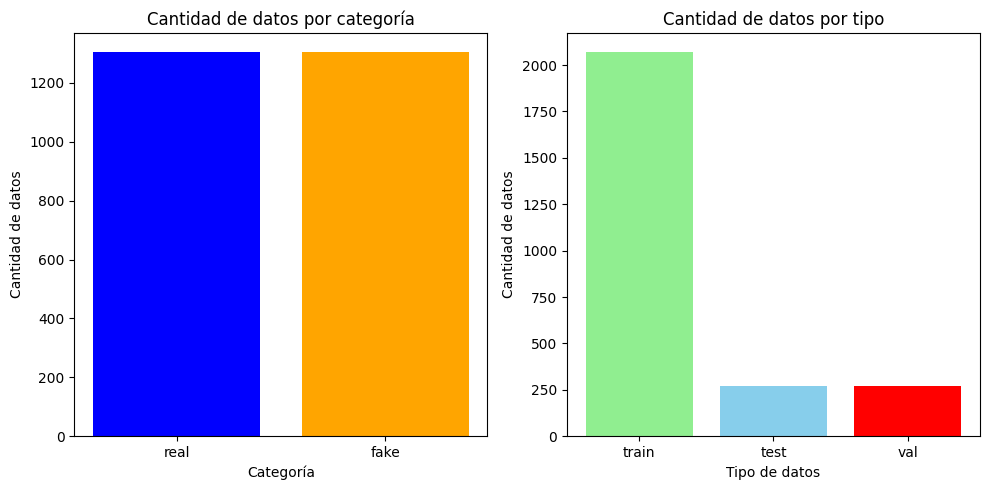

In [7]:
# Creamos un gráfico de barras para la categoría
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(categories, category_counts, color=colors_category)
plt.title('Cantidad de datos por categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de datos')

# Creamos un gráfico de barras para el tipo
plt.subplot(1, 2, 2)
plt.bar(data_types, data_counts, color=colors_data)
plt.title('Cantidad de datos por tipo')
plt.xlabel('Tipo de datos')
plt.ylabel('Cantidad de datos')

# Mostramos el gráfico
plt.tight_layout()
plt.show()

Cargamos todas las rutas de imágenes en dos dataframes divididos en ``real`` y ``fake``

In [8]:
# Cargar el archivo CSV
df = pd.read_csv(labeled_dataset_path)  

# Guardamos dos dataframes distintos por categoria
real_images_df = df[df['category_label'] == 'real']
fake_images_df = df[df['category_label'] == 'fake']

# Obtener las rutas de las imágenes
real_train_images = real_images_df['image_path'].tolist()
fake_train_images = fake_images_df['image_path'].tolist()

## 2. Pre-procesado de datos

Método para reescalar las imagenes

In [9]:
# Función para redimensionar una imagen
def resize_image(image, width, height):
    resized_image = cv2.resize(image, (width, height))
    return resized_image

Estudiamos como se aplican distintos formatos de ``resize`` a nuestras imágenes

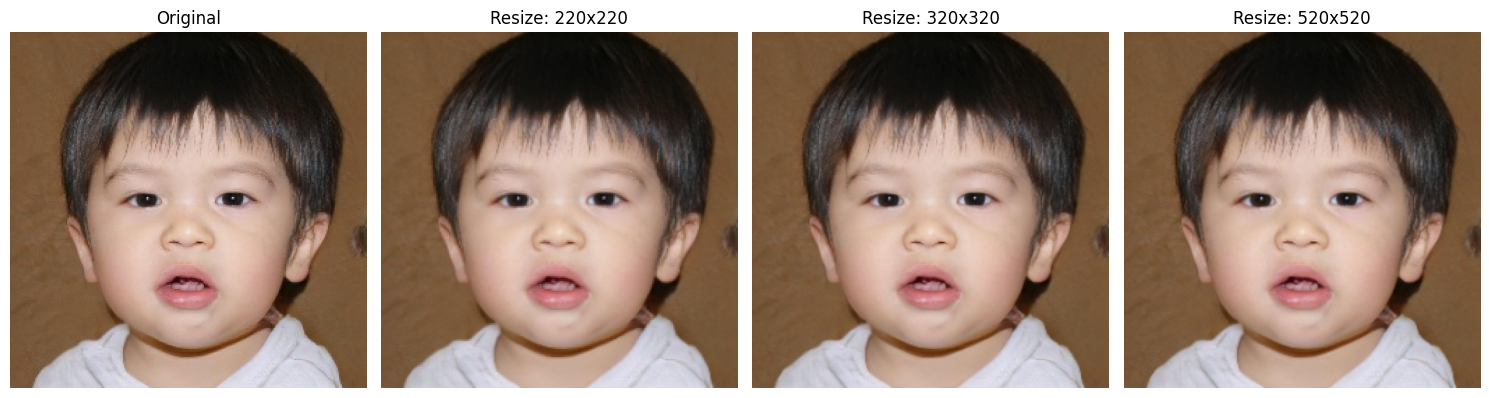

In [11]:
# Distintos tamaños a probar
sizes = [220, 320, 520]

# Elegimos una imágen aleatoria para aplicarle los resizes
sample_fake_image = random.choice(fake_train_images)
img = cv2.imread(sample_fake_image)

# Creamos una lista para almacenar las imágenes
images = []

# Agregamos la imagen original 
images.append(img)

for size in sizes:
  resized_img = resize_image(img, size, size)
  images.append(resized_img)

# Creamos una figura
plt.figure(figsize=(15, 15))


# Mostramos las imágenes con su tamaño
for i, (img, size) in enumerate(zip(images, [None] + sizes)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    if size:
        plt.title(f'Resize: {size}x{size}')
    else:
        plt.title(f'Original')

# Ajustamos el diseño de la figura
plt.tight_layout()
plt.show()